**Airbnb Listings Exploratory Data Analysis**

# Introduction

In the following notebook, I will be performing an EDA of Airbnb data in the San Francisco area. This data pertains to the last calendar year, which at the time of this analysis would from December 2018 through December 2019.

*GitHub Repo References*
The raw data files can be found [here](https://github.com/KishenSharma6/practice/tree/master/Data/01_Raw/SF%20Airbnb%20Raw%20Data).

The raw data aggregation script can be found [here](https://github.com/KishenSharma6/Airbnb-Analysis/blob/master/Project%20Codes/01.%20Raw%20Data%20Aggregation%20Scripts/2020_0129_Airbnb_Raw_Data_Aggregation.ipynb).

The data cleaning script can be found [here](https://github.com/KishenSharma6/Airbnb-Analysis/blob/master/Project%20Codes/02.%20Data%20Cleaning%20Scripts/2020_0130_Listings_Cleaning.ipynb).

## Read in libraries, data, and set notebook preferences

**Read in libraries**

In [2]:
#Read in libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Read in Data**

In [3]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\02_Intermediate/'

#Read listings Data
listings = pd.read_csv(path + '2020_0201_Listings_Cleaned.csv',index_col=0, low_memory=True, sep=',')

C:\Users\kishe\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Set notebook preferences**

In [4]:
#Set pandas options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',100)
pd.options.display.float_format = '{:.0f}'.format

#Set plot aesthetics
plt.style.use('ggplot')

#Ignore warnings
import warnings; warnings.simplefilter('ignore')

## Data Preview

In [5]:
#Preview listings data
display(listings.head())

,access,accommodates,amenities,availability_30,availability_365,bathrooms,bed_type,bedrooms,beds,chlc,chlc_private_rooms,chlc_shared_rooms,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,id,instant_bookable,interaction,is_location_exact,last_review,last_scraped,latitude,license,longitude,maximum_maximum_nights,maximum_minimum_nights,name,neighborhood_overview,neighbourhood_cleansed,notes,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,space,state,summary,transit,zipcode
0,*Full access to patio and backyard (shared wit...,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",0,77,1,Real Bed,1,2,1,0,0,2019-04-03,1 week ago,moderate,San Francisco,100,New update: the house next door is under const...,25,2009-07-23,2,We are a family with 2 boys born in 2009 and 2...,True,1169,True,True,1,"San Francisco, California, United States",Holly,Duboce Triangle,100,within an hour,2008-07-31,"['email', 'phone', 'facebook', 'reviews', 'kba']",* No Pets - even visiting guests for a short t...,958,True,A family of 4 lives upstairs with their dog. N...,True,2019-03-16,2019-04-03,38,STR-0001256,-122,30,1,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Western Addition,Due to the fact that we have children and a do...,183,51,170,Apartment,False,False,True,10,10,10,10,10,97,10,2,Entire home/apt,20190403130253,100,"Newly remodeled, modern, and bright garden uni...",CA,New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,94117
1,"Our deck, garden, gourmet kitchen and extensiv...",5,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",0,0,1,Real Bed,2,3,1,0,0,2019-04-03,4 months ago,strict_14_with_grace_period,San Francisco,100,We live in a large Victorian house on a quiet ...,0,2009-05-03,2,Philip: English transplant to the Bay Area and...,True,8904,True,False,2,"San Francisco, California, United States",Philip And Tania,Bernal Heights,80,within a day,2009-03-02,"['email', 'phone', 'reviews', 'kba', 'work_ema...","Please respect the house, the art work, the fu...",5858,False,Unavailable,True,2017-08-06,2019-04-03,38,Unavailable,-122,60,30,Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,All the furniture in the house was handmade so...,111,0,235,Apartment,False,False,True,10,10,10,10,10,98,9,1,Entire home/apt,20190403130253,250,We live in a large Victorian house on a quiet ...,CA,Unavailable,The train is two blocks away and you can stop ...,94110
2,Unavailable,2,"{TV,Internet,Wifi,Kitchen,""Free street parking...",30,365,4,Real Bed,1,1,9,9,0,2019-04-03,17 months ago,strict_14_with_grace_period,San Francisco,50,Nice and good public transportation. 7 minute...,12,2009-08-31,1,7 minutes walk to UCSF. 15 minutes walk to US...,True,21994,True,False,10,"San Francisco, California, United States",Aaron,Cole Valley,100,within a few hours,2009-06-17,"['email', 'phone', 'reviews', 'jumio', 'govern...","No party, No smoking, not for any kinds of smo...",7918,False,Unavailable,True,2016-11-21,2019-04-03,38,Unavailable,-122,60,32,A Friendly Room - UCSF/USF - San Francisco,"Shopping old town, restaurants, McDonald, Whol...",Haight Ashbury,Please email your picture id with print name (...,17,0,65,Apartment,False,False,True,8,9,8,9,9,85,8,0,Private room,20190403130253,200,Room rental-sunny view room/sink/Wi Fi (inner ...,CA,Nice and good pub

# Exploratory Data Analysis

- How has Airbnb grown over the last year? Which neighborhoods have shown the most growth?
- What are the metrics for the different neighborhoods in SF?
- Are airbnb's that are available for monthly rent competitive with the local rent market? Is Airbnb a legitmate option to consider for short term living as opposed to finding month to month leases?
- What are the different data distributions for the different outcome variables we are interested in exploring?



#### What are the different data distributions for the different outcome variables we are interested in exploring?


date

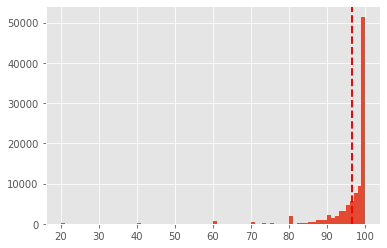

In [6]:
#plot hist
listings.review_scores_rating.hist(bins = 80)

#plot the mean
mean = np.mean(listings.review_scores_rating)

plt.axvline(mean, color='r', linewidth=2, linestyle='--', label= str(round(mean,2)))

Listings price

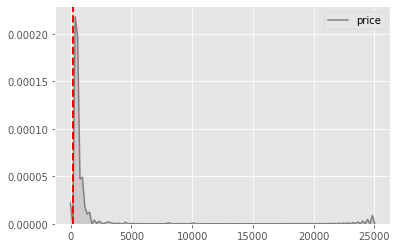

In [7]:
#KDE
ax = sns.kdeplot(listings.price, shade=True, color="grey")

#plot the mean
mean = np.mean(listings.price)

plt.axvline(mean, color='r', linewidth=2, linestyle='--', label= str(round(mean,2)))

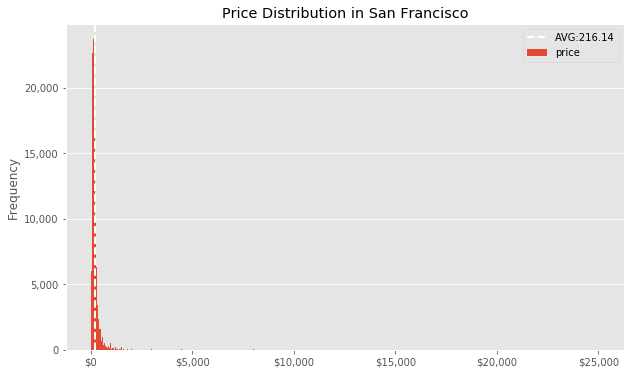

In [14]:
#Set ggplot plot style
plt.style.use('ggplot')

#Airbnb price distributions(outliers removed)
listings.price.plot(kind = 'hist', bins=500,  title='Price Distribution in San Francisco',
           figsize=(10,6));

#Capture mean and median of price
mean = listings.price.mean()
median = listings.price.median()

#Plot mean and median
plt.axvline(mean, color='white', linewidth=2, linestyle='--', label= 'AVG:'+ str(round(mean,2)))

#Get axis object
ax = plt.gca()

#Format axes
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Mute grid lines
plt.grid(b=False, which ='major', axis = 'x')

#Set legend
plt.legend(loc='upper right',frameon=True, fancybox=True)

#Save plot to png
#plt.savefig(path + '\Listings Data Price Distribution.png',bbox_inches = 'tight')

Over the last year, there has been significant growth in the number of listings available for rent month to month. Let us look into the number of nights booked by users over the last year.

Latitude and longitude

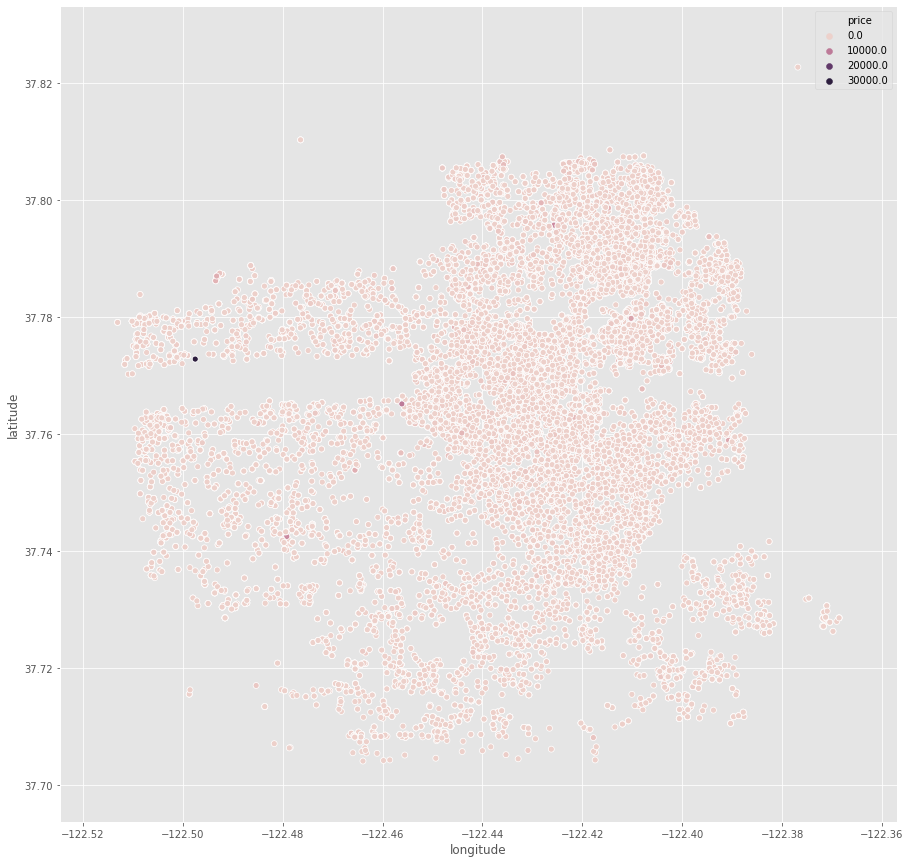

In [16]:
fig, ax = plt.subplots(figsize = (15,15))

sns.scatterplot(x='longitude', y = 'latitude',hue = 'price', data = listings[::3], ax = ax)

**Prices by property type**


Which neighborhoods are the nicest? Which are the safest? Refercne the review scores and location rating in listings

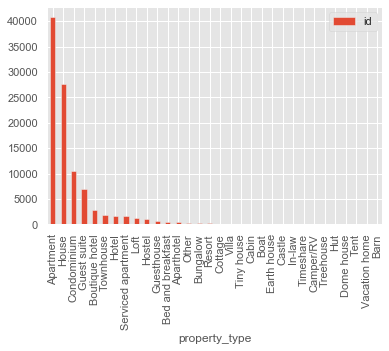

In [19]:
#Set 538 plot style
plt.style.use('ggplot')

#Counts of property types
prop_count = listings.groupby('property_type')['id'].count().sort_values(ascending = False).reset_index()
prop_count.plot(x = 'property_type', y = 'id', kind = 'bar')

In [20]:
#Get top 15 common prop types
prop_list=list(prop_count.property_type.head(15))

#sort top 15 by median value
test = listings[listings.property_type.isin(prop_list)].groupby('property_type')['price'].median().sort_values(ascending = False).reset_index()

In [21]:
test_list = test.property_type.tolist()

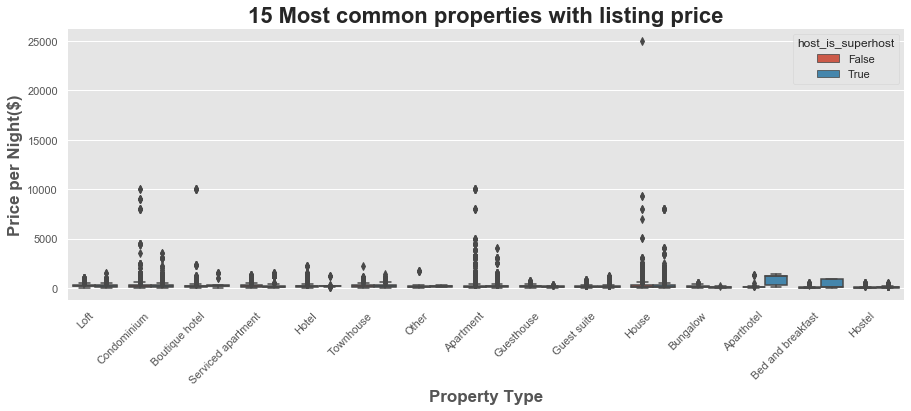

In [22]:
#Set 538 plot style
#plt.style.use('fivethirtyeight')

#Set Figure
f, ax = plt.subplots(figsize= (15,5))

#Plot
g= sns.boxplot(x="property_type", y="price",hue = 'host_is_superhost', order=test_list,
                data=listings[listings.property_type.isin(test_list)], ax=ax)

#Set Title
ax.set_title('15 Most common properties with listing price', fontweight = 'bold', fontsize=22)

#Set fontdict
fontdict={'weight' : 'bold',
          'size': 17}

#Set x and y Labels
ax.set_ylabel('Price per Night($)',fontdict=fontdict)
ax.set_xlabel('Property Type',fontdict=fontdict)

#Rotate x_ticklabels
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

#Format ticks on y-axis

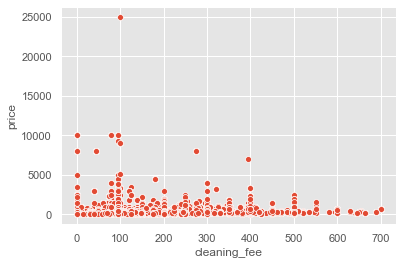

In [23]:
sns.scatterplot(x = 'cleaning_fee', y='price', data = listings)

#Superhost?

Explore what makes a super host.
Why would you want to be a super host
What advantages can you find to being a super host? (higher reviews, higher rent, more business?)

In [24]:
len(listings[listings.host_is_superhost == False])

58152

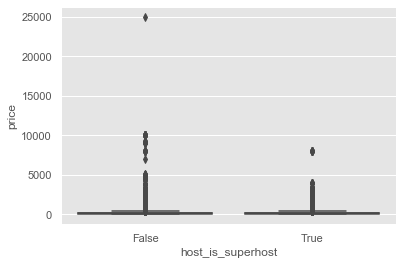

In [25]:
#Add values
sns.boxplot( x = 'host_is_superhost', y='price', data = listings)

Who owns the most Airbnb properties?

https://towardsdatascience.com/airbnb-rental-listings-dataset-mining-f972ed08ddec

In [26]:
len(listings[listings.host_is_superhost == False])

58152

In [27]:
test = listings.groupby(['host_id'])['id'].agg({'nunique'}).sort_values(by ='nunique', ascending =False).reset_index()

#Get a list of the properties owned by the top host ids
test_list = list(test.host_id.head(10))#might be worth doing more than 10, maybe anything more than listing id1?
#would differentitate the average host? Perhaps calculate aberage lisitng ids per host and get the outliers?

#get the listings data
listings[listings.host_id.isin(test_list)].head(10).T

,2316,2539,2568,2627,2637,2682,2730,2774,2836,2857
access,Unavailable,"As our guest, you will have full access to you...","As our guest, you will have full access to you...",Unavailable,"As our guest, you will have full access to you...","As our guest, you will have full access to you...","As our guest, you will have full access to you...","As our guest, you will have full access to you...","This is a functioning hotel, guests can access...","As our guest, you will have full access to you..."
accommodates,4,3,2,4,2,2,3,2,2,2
amenities,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free str...","{TV,Internet,Wifi,Kitchen,Heating,""Smoke detec...","{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...","{TV,""Cable TV"",Internet,Wifi,""Air conditioning...","{TV,Internet,Wifi,Elevator,Heating,Washer,Drye...","{TV,Internet,Wifi,Kitchen,Heating,""Smoke detec...","{TV,Internet,Wifi,Kitchen,Heating,Washer,Dryer...","{TV,Internet,Wifi,Kitchen,Elevator,Heating,Was...","{TV,""Cable TV"",""Air conditioning"",""Paid parkin...","{TV,Internet,Wifi,Kitchen,Elevator,Heating,Was..."
availability_30,0,0,0,0,2,0,29,0,0,0
availability_365,329,139,116,277,14,15,89,25,0,31
bathrooms,2,1,1,2,1,1,1,1,1,1
bed_type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
bedrooms,2,1,0,2,0,0,1,0,0,0
beds,2,2,1,2,1,1,1,1,1,1
chlc,216,87,87,216,87,87,87,87,20,87


When is the cheapest days for travel? How do prices compare during holiday>